# Real-world Data Wrangling

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data


### **1.1.** Problem Statement
This project investigates how patient demographics and medical diagnoses influence hospital outcomes, such as discharge status or complications. The aim is to identify patterns in how factors like age, sex, race, and specific diagnoses affect patient outcomes. To support this analysis, two datasets are wrangled: a patient-level CSV file containing anonymized demographic, diagnostic, and hospital admission data, and a JSON dataset from the CDC providing population-level health indicators. Combining these datasets enables a richer analysis of individual and population-level health measures.

### **1.2.** Gather at least two datasets using two different data gathering methods

The patient-level CSV dataset was chosen because it contains anonymized demographics, diagnoses, and hospital outcomes, which are essential for analyzing how factors such as age, sex, race, and specific conditions influence patient outcomes. The CDC JSON dataset provides population-level health indicators to contextualize patient outcomes and compare them with broader public health trends. This JSON dataset can be programmatically accessed via the CDC API

#### **Dataset 1**

`Type`: JSON File / API

`Method`: The data was gathered by sending a GET request to the CDC Chronic Disease Indicators API, which provides survey-based adult health outcome statistics for different demographic subgroups

`Dataset variables`:

`outcome_or_indicator`: Name of the health outcome or disease being measured.

`grouping_category`: Type of demographic grouping (e.g., Sex, Age Group, Race/Ethnicity, Total).

`group`: Specific subgroup within the grouping_category (e.g., Male, Female, 18–24).

`percentage`: Percentage of adults in the subgroup with the outcome.

`confidence_interval`: Text field containing the lower and upper bounds of the confidence interval.

`title`: Full descriptive title of the measure.

`description`: Additional details about how the measure was collected.

`year`: Year the measure was collected.


[source link](https://catalog.data.gov/dataset/nhis-adult-summary-health-statistics-b5ce9)

In [2]:
# Load JSON Dataset

URL = "https://data.cdc.gov/api/views/25m4-6qqq/rows.json?accessType=DOWNLOAD"


# Request JSON
response = requests.get(URL)

if response.status_code in [200, 201, 202]:
    print("API Request Successful!")
    
    # Inspect raw JSON if needed
    data = response.json()
    
    # Extract records and columns
    records = data["data"]
    columns = [col["fieldName"] for col in data["meta"]["view"]["columns"]]
    
    # Build DataFrame
    df_json = pd.DataFrame(records, columns=columns)
    
    # Drop system fields (those starting with :)
    df_json = df_json.drop(columns=[c for c in df_json.columns if c.startswith(":")])
    
    
    
else:
    print("API Request Failed!")
    response.raise_for_status()

API Request Successful!


In [3]:
df_json.head()

,outcome_or_indicator,grouping_category,group,percentage,confidence_interval,title,description,year
0,Coronary heart disease,Total,Total,4.6,"4.3, 4.9",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
1,Coronary heart disease,Sex,Male,5.9,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.4,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
3,Coronary heart disease,Age groups with 65+,18-34 years,0.3,"0.2, 0.5",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4,Coronary heart disease,Age groups with 65+,35-49 years,0.9,"0.6, 1.2",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019


#### Dataset 2

`Type`: CSV File

`Method`: The CSV contains anonymized patient-level demographic, diagnostic, and hospital admission/outcome data.

`Dataset variables`:

`id`: Internal row identifier.

`patient_id`: Unique anonymized patient identifier.

`outcome`: Patient hospital outcome (e.g., discharged, deceased).

`group`: Group label (may overlap with demographic info).

`age`: Patient age at admission.

`race`: Patient race/ethnicity.

`sex`: Patient sex.

`hypertension`: 1 = has hypertension, 0 = does not have hypertension.

`hyperlipidemia`: 1 = has high cholesterol, 0 = does not have high cholesterol.

`diabetes`: 1 = has diabetes, 0 = does not have diabetes.

`coronary.artery.disease`: 1 = has coronary artery disease, 0 = does not have coronary artery disease.

`chf`: 1 = has congestive heart failure, 0 = does not have congestive heart failure.

`cerebrovascular.disease`: 1 = has stroke or transient ischemic attack (TIA), 0 = does not have stroke/TIA.

`hepatitis`: 1 = has hepatitis, 0 = does not have hepatitis.

`endstage.renal.disease`: 1 = has end-stage renal disease, 0 = does not have end-stage renal disease.

`chronic.kidney.disease`: 1 = has chronic kidney disease, 0 = does not have chronic kidney disease.

`asthma`: 1 = has asthma, 0 = does not have asthma.

`copd`: 1 = has chronic obstructive pulmonary disease, 0 = does not have COPD.

`dementia`: 1 = has dementia, 0 = does not have dementia.

`cancer`: 1 = has any cancer diagnosis, 0 = does not have cancer.

`weekday_change_of_status`: Weekday of outcome change.

`hour_change_of_status`: Hour of outcome change.

`weekday_admit`: Weekday of admission.

`hour_admit`: Hour of admission.

`days_change_of_status`: Days from admission to outcome change.

`date_admit`: Admission date.

`date_change_of_status`: Date of outcome change.

`hospital`: Hospital identifier.

[here is the link](https://catalog.data.gov/dataset/nhis-adult-summary-health-statistics-b5ce9)

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv("./demographics_both_hospitals.csv")

# Preview the first 5 rows to inspect the raw data
df.head()  


,id,patient_id,outcome,group,age,race,sex,hypertension,hyperlipidemia,diabetes,...,dementia,cancer,weekday_change_of_status,hour_change_of_status,weekday_admit,hour_admit,days_change_of_status,date_admit,date_change_of_status,hospital
0,1.0,Patient 1,1,Expired,93.0,black,male,1.0,0.0,0.0,...,0.0,0.0,Sat,9.0,Tue,15.0,10.779167,2020-04-07 15:09:00,2020-04-18 09:51:00,SUNY
1,2.0,Patient 2,1,Expired,87.0,black,female,0.0,0.0,0.0,...,1.0,0.0,Sun,12.0,Mon,17.0,5.780556,2020-03-30 17:51:00,2020-04-05 12:35:00,SUNY
2,3.0,Patient 3,1,Expired,92.0,black,female,1.0,0.0,0.0,...,0.0,0.0,Wed,10.0,Fri,22.0,4.497917,2020-04-10 22:30:00,2020-04-15 10:27:00,SUNY
3,4.0,Patient 4,1,Expired,83.0,black,female,1.0,0.0,0.0,...,0.0,0.0,Tue,21.0,Sun,21.0,2.015278,2020-03-29 21:28:00,2020-03-31 21:50:00,SUNY
4,5.0,Patient 5,1,Expired,83.0,white,female,1.0,0.0,1.0,...,0.0,0.0,Wed,18.0,Mon,23.0,1.803472,2020-04-06 23:00:00,2020-04-08 18:17:00,SUNY


In [5]:
df.head()

,id,patient_id,outcome,group,age,race,sex,hypertension,hyperlipidemia,diabetes,...,dementia,cancer,weekday_change_of_status,hour_change_of_status,weekday_admit,hour_admit,days_change_of_status,date_admit,date_change_of_status,hospital
0,1.0,Patient 1,1,Expired,93.0,black,male,1.0,0.0,0.0,...,0.0,0.0,Sat,9.0,Tue,15.0,10.779167,2020-04-07 15:09:00,2020-04-18 09:51:00,SUNY
1,2.0,Patient 2,1,Expired,87.0,black,female,0.0,0.0,0.0,...,1.0,0.0,Sun,12.0,Mon,17.0,5.780556,2020-03-30 17:51:00,2020-04-05 12:35:00,SUNY
2,3.0,Patient 3,1,Expired,92.0,black,female,1.0,0.0,0.0,...,0.0,0.0,Wed,10.0,Fri,22.0,4.497917,2020-04-10 22:30:00,2020-04-15 10:27:00,SUNY
3,4.0,Patient 4,1,Expired,83.0,black,female,1.0,0.0,0.0,...,0.0,0.0,Tue,21.0,Sun,21.0,2.015278,2020-03-29 21:28:00,2020-03-31 21:50:00,SUNY
4,5.0,Patient 5,1,Expired,83.0,white,female,1.0,0.0,1.0,...,0.0,0.0,Wed,18.0,Mon,23.0,1.803472,2020-04-06 23:00:00,2020-04-08 18:17:00,SUNY


## 2. Assess data



### Quality Issue 1: completeness

In [6]:
# Preview the last 5 rows to inspect the null entries
df.tail()

,id,patient_id,outcome,group,age,race,sex,hypertension,hyperlipidemia,diabetes,...,dementia,cancer,weekday_change_of_status,hour_change_of_status,weekday_admit,hour_admit,days_change_of_status,date_admit,date_change_of_status,hospital
1535,0.675302,Patient 0.675302284137609,1,Expired,75.0,white,male,1.0,1.0,0.0,...,0.0,0.0,Mon,12.0,Fri,22.0,2.592361,2020-03-20 22:29:00,2020-03-23 12:42:00,Maimonides
1536,0.677142,Patient 0.677141665733197,1,Expired,89.0,white,female,0.0,0.0,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimonides
1537,0.679798,Patient 0.679798359880815,1,Expired,89.0,white,male,1.0,0.0,0.0,...,0.0,0.0,Wed,8.0,Mon,7.0,2.030556,2020-04-20 07:51:00,2020-04-22 08:35:00,Maimonides
1538,0.680235,Patient 0.680235144005841,1,Expired,68.0,white,male,1.0,0.0,0.0,...,0.0,0.0,Thu,6.0,Sun,19.0,3.429861,2020-04-05 19:58:00,2020-04-09 06:17:00,Maimonides
1539,0.680288,Patient 0.680287573720191,1,Expired,89.0,asian,female,1.0,1.0,0.0,...,0.0,0.0,Thu,7.0,Fri,11.0,5.820833,2020-04-24 11:27:00,2020-04-30 07:09:00,Maimonides


In [7]:
# Nulls in age, race, sex, or diagnosis columns can affect analysis or model performance
df.isnull().sum()

id                            0
patient_id                    0
outcome                       0
group                         0
age                          11
race                         44
sex                          14
hypertension                  6
hyperlipidemia                6
diabetes                      6
coronary.artery.disease       6
chf                           6
cerebrovascular.disease       6
hepatitis                     6
endstage.renal.disease        6
chronic.kidney.disease        6
asthma                        6
copd                          6
dementia                      6
cancer                        6
weekday_change_of_status    130
hour_change_of_status       130
weekday_admit               124
hour_admit                  124
days_change_of_status       130
date_admit                  124
date_change_of_status       130
hospital                      0
dtype: int64

`Issue`: Several columns in the dataset contain missing values, including `age` (11 missing), `race` (44 missing), `sex` (14 missing), and multiple diagnosis columns (6 missing each). These gaps compromise the completeness of the dataset and could introduce bias into statistical analyses or predictive models if not addressed.

`Justification`: Performing a completeness check using `df.isnull().sum()` identifies columns with missing entries. Visual inspection and quantification of missing values help prioritize cleaning strategies, such as imputation or removal, ensuring that subsequent analyses are reliable and representative.

### Quality Issue 2: Validity

In [8]:
# Filter DataFrame to only include invalid 'percentage' values
invalid_percentage_df = df_json[df_json['percentage'].isin(['999','888'])]

# Show the first 5 rows
invalid_percentage_df.head()

,outcome_or_indicator,grouping_category,group,percentage,confidence_interval,title,description,year
15,Coronary heart disease,Race,Native Hawaiian or Other Pacific Islander only,999,None,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
16,Coronary heart disease,Race,Black and White,888,None,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
17,Coronary heart disease,Race,American Indian or Alaska Native and White,999,None,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
53,Coronary heart disease,Health insurance coverage: 65 and over,Uninsured,999,None,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
93,Angina/angina pectoris,Race,Native Hawaiian or Other Pacific Islander only,999,None,Percentage of angina for adults aged 18 and ov...,Respondents were asked if they had ever been t...,2019


In [9]:
df_json['percentage'].isin(['999','888']).sum()

847

`Issue`: The `percentage` column contains clearly invalid entries such as `999` and `888`, affecting 847 rows. These values exceed the expected 0–100 range for percentages and likely represent placeholders or erroneous data.

Justification: Validity checks confirm that numeric values conform to expected ranges. Using `.isin(['999','888']).sum()` quantifies the extent of invalid entries, while previewing the affected rows with `.head()` provides context for cleaning. Addressing these invalid values is essential to prevent bias in statistical summaries and downstream analysis.

### Tidiness Issue 1: Confidence Interval Column

In [10]:
# Preview a few rows of the confidence_interval column
df_json[['outcome_or_indicator','year','confidence_interval']].head()

,outcome_or_indicator,year,confidence_interval
0,Coronary heart disease,2019,"4.3, 4.9"
1,Coronary heart disease,2019,"5.5, 6.3"
2,Coronary heart disease,2019,"3.1, 3.7"
3,Coronary heart disease,2019,"0.2, 0.5"
4,Coronary heart disease,2019,"0.6, 1.2"


In [11]:
# Count how many rows contain multiple values in confidence_interval

num_multi_values = df_json['confidence_interval'].str.contains(',').sum()

print(f"Number of rows with multiple values in 'confidence_interval': {num_multi_values}")

Number of rows with multiple values in 'confidence_interval': 23633


`Issue`: The `confidence_interval` column contains two numeric values (lower and upper bounds) combined in a single string, e.g., "4.3, 4.9".

`Justification`: Tidiness rule: each variable should form its own column. Visual inspection shows that the lower and upper bounds are combined in one cell; programmatic check using `.str.contains(',').sum()` confirms the number of rows affected, highlighting the structural tidiness issue.

### Tidiness Issue 2: Multiple Diagnosis Columns

In [12]:
# List of diagnosis columns

diagnosis_cols = ['hypertension','hyperlipidemia','diabetes','coronary.artery.disease',
                  'chf','cerebrovascular.disease','hepatitis','endstage.renal.disease',
                  'chronic.kidney.disease','asthma','copd','dementia','cancer']

df[diagnosis_cols + ['patient_id']].head()

,hypertension,hyperlipidemia,diabetes,coronary.artery.disease,chf,cerebrovascular.disease,hepatitis,endstage.renal.disease,chronic.kidney.disease,asthma,copd,dementia,cancer,patient_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Patient 1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Patient 2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Patient 3
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Patient 4
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Patient 5


In [13]:
# Check how many patients have more than one diagnosis recorded
num_patients_multiple_diagnoses = (df[diagnosis_cols].notnull().sum(axis=1) > 1).sum()
print(f"Number of patients with multiple diagnoses recorded: {num_patients_multiple_diagnoses}")

Number of patients with multiple diagnoses recorded: 1534


`Issue`: Columns such as `diabetes`, `hypertension`, `asthma`, etc., each represent a separate diagnosis, but all relate to the same variable (“diagnosis”) for the patient.

`Justification`: Tidiness rule: each observation should form its own row. Visual inspection shows that each patient’s diagnoses are spread across multiple columns.

## 3. Clean data


In [14]:
# Keep a copy of JSON dataset

df_j = df_json.copy()

#Create a copy of CSV dataset

df_c = df.copy()


### **Quality Issue 1: completeness**

In [15]:
# Fill missing age with median
df_c['age'] = df_c['age'].fillna(df_c['age'].median())

In [16]:
df_c['age'].isnull().sum()

0

**`Justification`**:

Filling missing values in `age` with the median preserves the overall distribution while minimizing the loss of records, whereas treating missing diagnosis indicators as 0 is justified because these binary variables likely reflect the absence of the condition rather than unrecorded data. For categorical variables such as `race`, imputing `"Unknown"` maintains dataset integrity and prevents bias, while leaving non-critical time-related columns (`weekday_change_of_status`, `hour_change_of_status`, `weekday_admit`, `hour_admit`, `days_change_of_status`, `date_admit`, `date_change_of_status`) as `NaN` is appropriate since they are optional for the intended analysis and retaining `NaN` preserves analytical flexibility.

### **Quality Issue 2: Validity**

In [17]:
# first let's check data types
df_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26208 entries, 0 to 26207
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   outcome_or_indicator  26208 non-null  object
 1   grouping_category     26208 non-null  object
 2   group                 26208 non-null  object
 3   percentage            26208 non-null  object
 4   confidence_interval   23633 non-null  object
 5   title                 26208 non-null  object
 6   description           26052 non-null  object
 7   year                  26208 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [18]:
# Convert percentage to numeric, invalid strings will become NaN
df_j['percentage'] = pd.to_numeric(df_j['percentage'], errors='coerce')

In [19]:
df_j['year'] = pd.to_numeric(df_j['year'], errors='coerce', downcast='integer')

In [20]:
# Detect Invalid Values

invalid_vals = df_j[(df_j['percentage'] < 0) | (df_j['percentage'] > 100)]

print(invalid_vals['percentage'].unique())

[999. 888. 555. 777.]


In [21]:
print ("invalid percentage shape")
print (invalid_vals.shape)
print ("JSON dataset shape")
print (df_j.shape)             

invalid percentage shape
(2575, 8)
JSON dataset shape
(26208, 8)


In [22]:
# Define invalid percentage codes
invalid_codes = [999, 888, 555, 777]

# Drop rows in df_j where 'percentage' is invalid
df_j = df_j[~df_j['percentage'].isin(invalid_codes)]

In [23]:
remaining_invalid = df_j[df_j['percentage'].isin(invalid_codes)]
print("Remaining invalid rows :", remaining_invalid.shape[0])

Remaining invalid rows : 0


**`Justification`**:

The `percentage` column contains placeholder codes (`999`, `888`, `555`, `777`) that fall outside the valid 0–100 range and are accompanied by missing `confidence_interval`, indicating they are not valid observations. These rows represent a small fraction of the dataset (2,575 out of 26,209 rows, ~9.8%) and, if retained, would distort the statistical distribution of percentages. Dropping these rows preserves the integrity of the dataset, ensures that subsequent analyses are based only on reliable measurements, and avoids introducing bias that could result from imputation or arbitrary correction. 

### **Tidiness Issue 1: Confidence Interval Column**

In [24]:
# Split confidence_interval into two numeric columns
df_j[['ci_lower', 'ci_upper']] = df_j['confidence_interval'].str.split(',', expand=True)

# Convert to float
df_j['ci_lower'] = pd.to_numeric(df_j['ci_lower'], errors='coerce')
df_j['ci_upper'] = pd.to_numeric(df_j['ci_upper'], errors='coerce')

# Drop the original column
df_j.drop(columns=['confidence_interval'], inplace=True)

In [25]:
df_j.head()

,outcome_or_indicator,grouping_category,group,percentage,title,description,year,ci_lower,ci_upper
0,Coronary heart disease,Total,Total,4.6,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019,4.3,4.9
1,Coronary heart disease,Sex,Male,5.9,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019,5.5,6.3
2,Coronary heart disease,Sex,Female,3.4,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019,3.1,3.7
3,Coronary heart disease,Age groups with 65+,18-34 years,0.3,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019,0.2,0.5
4,Coronary heart disease,Age groups with 65+,35-49 years,0.9,Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019,0.6,1.2


**`Justification`**:

The original `confidence_interval` column combined lower and upper bounds into a single string (e.g., "4.3, 4.9"), which violates tidiness principles. Splitting this column into two numeric columns (ci_lower and ci_upper) ensures that each variable occupies its own column and can be used directly in statistical analyses. Converting to numeric also prevents errors in downstream computations and maintains the integrity of confidence interval information.

### **Tidiness Issue 2: Multiple Diagnosis Columns**

In [26]:
# Melt to tidy format
df_c = df_c.melt(
    id_vars=['id','patient_id','outcome','group','age','race','sex','weekday_change_of_status',
             'hour_change_of_status','weekday_admit','hour_admit','days_change_of_status',
             'date_admit','date_change_of_status','hospital'],
    value_vars= diagnosis_cols,
    var_name='diagnosis',
    value_name='has_condition'
)

In [27]:
df_c.head()

,id,patient_id,outcome,group,age,race,sex,weekday_change_of_status,hour_change_of_status,weekday_admit,hour_admit,days_change_of_status,date_admit,date_change_of_status,hospital,diagnosis,has_condition
0,1.0,Patient 1,1,Expired,93.0,black,male,Sat,9.0,Tue,15.0,10.779167,2020-04-07 15:09:00,2020-04-18 09:51:00,SUNY,hypertension,1.0
1,2.0,Patient 2,1,Expired,87.0,black,female,Sun,12.0,Mon,17.0,5.780556,2020-03-30 17:51:00,2020-04-05 12:35:00,SUNY,hypertension,0.0
2,3.0,Patient 3,1,Expired,92.0,black,female,Wed,10.0,Fri,22.0,4.497917,2020-04-10 22:30:00,2020-04-15 10:27:00,SUNY,hypertension,1.0
3,4.0,Patient 4,1,Expired,83.0,black,female,Tue,21.0,Sun,21.0,2.015278,2020-03-29 21:28:00,2020-03-31 21:50:00,SUNY,hypertension,1.0
4,5.0,Patient 5,1,Expired,83.0,white,female,Wed,18.0,Mon,23.0,1.803472,2020-04-06 23:00:00,2020-04-08 18:17:00,SUNY,hypertension,1.0


**`Justification`**:

Columns such as `diabetes`, `hypertension`, `asthma`, etc., each represented a separate diagnosis but all correspond to a single variable “diagnosis” for the patient. Melting these columns into a single diagnosis column with a corresponding has_condition indicator (`1` = patient has condition, `0` = does not) resolves the tidiness issue. This ensures each observation (patient-diagnosis pair) occupies a single row, and each variable is stored in its own column, improving interpretability and analysis readiness.

### **Remove unnecessary variables and combine datasets**



In [28]:
# JSON dataset: keep only essential variables
df_j = df_j[['outcome_or_indicator', 'percentage', 'ci_lower', 'ci_upper', 'year']]

# Keep hospital column when selecting essential CSV variables 
df_c = df_c[['patient_id', 'age', 'sex', 'race', 'hospital', 'diagnosis', 'has_condition', 'outcome']]

In [29]:
# Melt raw CSV
df_c_raw_melt = df.melt(
    id_vars=['id','patient_id','outcome','group','age','race','sex','weekday_change_of_status',
             'hour_change_of_status','weekday_admit','hour_admit','days_change_of_status',
             'date_admit','date_change_of_status','hospital'],
    value_vars=diagnosis_cols,
    var_name='diagnosis',
    value_name='has_condition'
)

# Map CSV diagnosis to JSON indicators
mapping = {
    'hypertension': 'Diagnosed hypertension',
    'diabetes': 'Diagnosed diabetes',
    'asthma': 'Current asthma',
    'coronary.artery.disease': 'Coronary heart disease',
    'copd': 'COPD, emphysema, chronic bronchitis',
    'cancer': 'Any type of cancer',
    'chf': 'Congestive heart failure'
}
df_c_raw_melt['diagnosis_mapped_r'] = df_c_raw_melt['diagnosis'].replace(mapping)

# Reduce JSON to only relevant outcomes
relevant_outcomes = df_c_raw_melt['diagnosis_mapped_r'].unique()
df_j_filtered_r = df_json[df_json['outcome_or_indicator'].isin(relevant_outcomes)]

# Merge with JSON raw
df_merged_raw = pd.merge(
    df_c_raw_melt,
    df_j_filtered_r,
    left_on='diagnosis_mapped_r',
    right_on='outcome_or_indicator',
    how='left'
)

# Drop redundant columns
df_merged_raw.drop(columns=['diagnosis', 'outcome', 'outcome_or_indicator'], inplace=True)

# Rename for clarity
df_merged_raw.rename(columns={'diagnosis_mapped_r': 'diagnosis'}, inplace=True)

df_merged_raw.head()

,id,patient_id,group_x,age,race,sex,weekday_change_of_status,hour_change_of_status,weekday_admit,hour_admit,...,hospital,has_condition,diagnosis,grouping_category,group_y,percentage,confidence_interval,title,description,year
0,1.0,Patient 1,Expired,93.0,black,male,Sat,9.0,Tue,15.0,...,SUNY,1.0,Diagnosed hypertension,Total,Total,27,"26.4, 27.7",Percentage of diagnosed hypertension for adult...,Respondents were asked if they had ever been t...,2019
1,1.0,Patient 1,Expired,93.0,black,male,Sat,9.0,Tue,15.0,...,SUNY,1.0,Diagnosed hypertension,Sex,Male,27.2,"26.3, 28.1",Percentage of diagnosed hypertension for adult...,Respondents were asked if they had ever been t...,2019
2,1.0,Patient 1,Expired,93.0,black,male,Sat,9.0,Tue,15.0,...,SUNY,1.0,Diagnosed hypertension,Sex,Female,26.9,"26.1, 27.8",Percentage of diagnosed hypertension for adult...,Respondents were asked if they had ever been t...,2019
3,1.0,Patient 1,Expired,93.0,black,male,Sat,9.0,Tue,15.0,...,SUNY,1.0,Diagnosed hypertension,Age groups with 65+,18-34 years,3.8,"3.2, 4.4",Percentage of diagnosed hypertension for adult...,Respondents were asked if they had ever been t...,2019
4,1.0,Patient 1,Expired,93.0,black,male,Sat,9.0,Tue,15.0,...,SUNY,1.0,Diagnosed hypertension,Age groups with 65+,35-49 years,17.2,"16.1, 18.3",Percentage of diagnosed hypertension for adult...,Respondents were asked if they had ever been t...,2019


In [30]:
df_c['diagnosis_mapped'] = df_c['diagnosis'].replace(mapping)

# Reduce JSON to only relevant outcomes
relevant_outcomes = df_c['diagnosis_mapped'].unique()
df_j_filtered = df_j[df_j['outcome_or_indicator'].isin(relevant_outcomes)]

# Step 3: Broadcast JSON values to all matching patients
df_merged_clean = pd.merge(
    df_c,
    df_j_filtered,
    left_on='diagnosis_mapped',
    right_on='outcome_or_indicator',
    how='left'
)

df_merged_clean.head()

,patient_id,age,sex,race,hospital,diagnosis,has_condition,outcome,diagnosis_mapped,outcome_or_indicator,percentage,ci_lower,ci_upper,year
0,Patient 1,93.0,male,black,SUNY,hypertension,1.0,1,Diagnosed hypertension,Diagnosed hypertension,27.0,26.4,27.7,2019.0
1,Patient 1,93.0,male,black,SUNY,hypertension,1.0,1,Diagnosed hypertension,Diagnosed hypertension,27.2,26.3,28.1,2019.0
2,Patient 1,93.0,male,black,SUNY,hypertension,1.0,1,Diagnosed hypertension,Diagnosed hypertension,26.9,26.1,27.8,2019.0
3,Patient 1,93.0,male,black,SUNY,hypertension,1.0,1,Diagnosed hypertension,Diagnosed hypertension,3.8,3.2,4.4,2019.0
4,Patient 1,93.0,male,black,SUNY,hypertension,1.0,1,Diagnosed hypertension,Diagnosed hypertension,17.2,16.1,18.3,2019.0


In [31]:
df_c['diagnosis'].value_counts()

hypertension               1540
hyperlipidemia             1540
diabetes                   1540
coronary.artery.disease    1540
chf                        1540
cerebrovascular.disease    1540
hepatitis                  1540
endstage.renal.disease     1540
chronic.kidney.disease     1540
asthma                     1540
copd                       1540
dementia                   1540
cancer                     1540
Name: diagnosis, dtype: int64

In [32]:
df_j['outcome_or_indicator'].value_counts()

Doctor visit                                                                     464
Prescription medication use                                                      464
Wellness visit                                                                   463
Has a usual place of care                                                        463
Receipt of influenza vaccination                                                 462
Diagnosed hypertension                                                           462
Ever received a pneumococcal vaccination                                         462
Obesity                                                                          462
Hospital emergency department visit                                              461
Regularly had feelings of worry, nervousness, or anxiety                         459
Arthritis diagnosis                                                              459
Fair or poor health status                                       

## 4. Update your data store


In [33]:
df_merged_raw.to_csv("merged_dataset_raw.csv", index=False)
df_merged_clean.to_csv("merged_dataset_clean.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 


How do patient demographics (`age`, `sex`, `race`) relate to having a specific condition (e.g., hypertension, diabetes, asthma) ?

C:\Users\leena\AppData\Local\Temp\ipykernel_22804\3227461851.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_merged_raw, x='age_group', y='has_condition', hue='diagnosis', ci=None, palette='Set2')


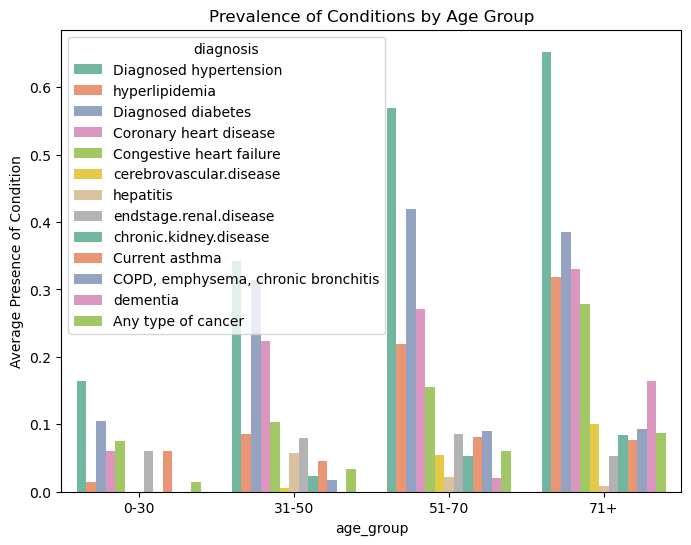

In [36]:
# Visual : Condition prevalence by age group
df_merged_raw['age_group'] = pd.cut(df_merged_raw['age'], bins=[0,30,50,70,100], labels=['0-30','31-50','51-70','71+'])
plt.figure(figsize=(8,6))
sns.barplot(data=df_merged_raw, x='age_group', y='has_condition', hue='diagnosis', ci=None, palette='Set2')
plt.title('Prevalence of Conditions by Age Group')
plt.ylabel('Average Presence of Condition')
plt.show()

The plot shows that as `age` increases, patients are more likely to have multiple `diagnose`s such as hypertension, diabetes, and coronary heart disease. Age appears to be strongly associated with higher prevalence of chronic conditions.

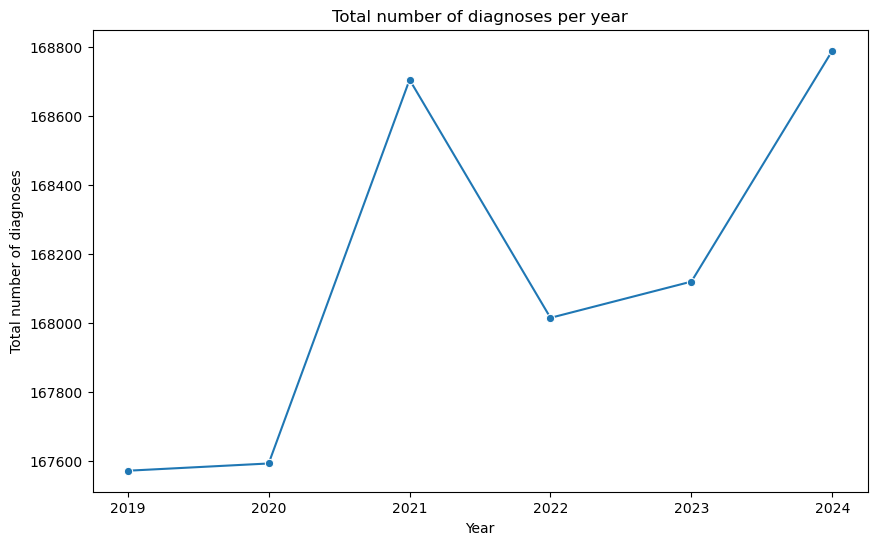

In [35]:
# Group by year (sum of all diagnoses across patients)
diagnosis_year_total = df_merged_clean.groupby('year')['has_condition'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=diagnosis_year_total,
    x='year', 
    y='has_condition',
    marker='o'
)
plt.title('Total number of diagnoses per year')
plt.xlabel('Year')
plt.ylabel('Total number of diagnoses')
plt.show()

The analysis of diagnoses over time shows that the total number of diagnoses across all conditions fluctuates noticeably from year to year. While some years recorded higher volumes like `2021` and `2024`, others experienced a decline like `2019` and `2020`, indicating that healthcare demand and diagnostic activity are not constant but vary over time. These shifts may reflect external influences such as changes in population health, policy updates, or hospital reporting practices. Overall, the trend highlights that diagnoses are influenced by temporal factors, emphasizing the importance of considering yearly variations when examining healthcare data.

### **5.2:** Reflection


If I had more time to complete the project, I would focus on resolving data quality issues such as missing values, duplicate entries, and inconsistent diagnosis labels. I would also explore structural improvements, like standardizing outcome measures and aligning year-based records. In terms of research, I would expand the analysis to include how specific conditions progress across age groups and how outcomes vary over time, offering a more comprehensive view of healthcare trends.